In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [74]:
# Load the iris dataset
iris = load_iris(return_X_y=True, as_frame=True)
data = iris[0]
target = iris[1]
df = pd.concat([data, target], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [75]:
# Select two classes (setosa and versicolor)
df = df.iloc[:100, [0, 2, -1]]
df

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
95,5.7,4.2,1
96,5.7,4.2,1
97,6.2,4.3,1
98,5.1,3.0,1


In [76]:
# Select only 2 features for visualization purpose
X = df.iloc[:,[0,1]].values
y = df.iloc[:, -1].values

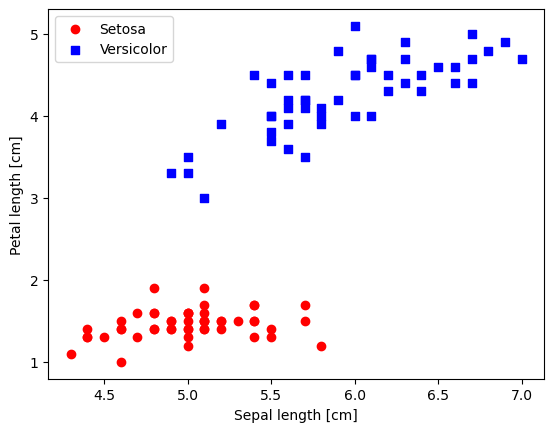

In [77]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],color='blue', marker='s', label='Versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [78]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

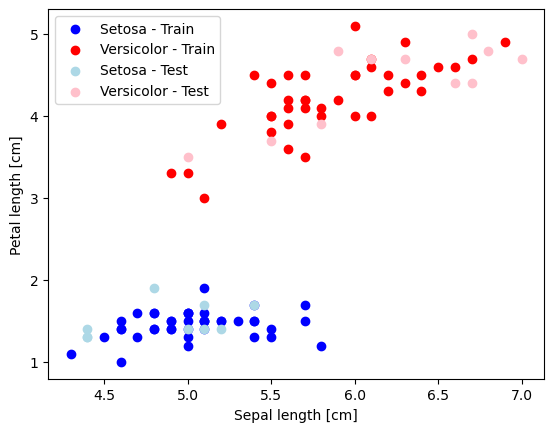

In [79]:
import matplotlib.pyplot as plt

# Create a scatter plot for training data
plt.scatter(X_train[y_train==0][:, 0], X_train[y_train==0][:, 1], color='blue', label='Setosa - Train')
plt.scatter(X_train[y_train==1][:, 0], X_train[y_train==1][:, 1], color='red', label='Versicolor - Train')

# Create a scatter plot for testing data, make them a bit grayish
plt.scatter(X_test[y_test==0][:, 0], X_test[y_test==0][:, 1], color='lightblue', label='Setosa - Test')
plt.scatter(X_test[y_test==1][:, 0], X_test[y_test==1][:, 1], color='pink', label='Versicolor - Test')

# Add labels and legend
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')

# Show the plot
plt.show()


In [80]:
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # initialize weights and bias
        # we want weights to have the length of the number of features because we have w for each feature
        self.weights = np.random.random(n_features)
        self.bias = 0
        
        max_label = np.max(y) # Finds the maximum label in the 'y' array (original labels)
        y_ = np.array([1 if i == max_label else 0 for i in y]) # Transforms labels in 'y' to binary
        
        for iter in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_function(linear_output)
                
                # Perceptron update rule
                update = self.learning_rate * (y_predicted - y_[idx])
                
                self.weights = self.weights - update * x_i
                self.bias = self.bias - update
        
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_function(linear_output)
        return y_predicted
    
    def activation_function(self, x):
        return np.where(x>=0, 1, 0)

In [81]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [82]:
model = Perceptron()
model.fit(X_train, y_train)

In [83]:
model.weights

array([-0.10596857,  0.30369334])

In [84]:
model.bias

-0.04

In [85]:
predictions = model.predict(X_test)

In [86]:
print(f'Perceptron classification accuracy: {accuracy(y_test, predictions)}')


Perceptron classification accuracy: 0.95


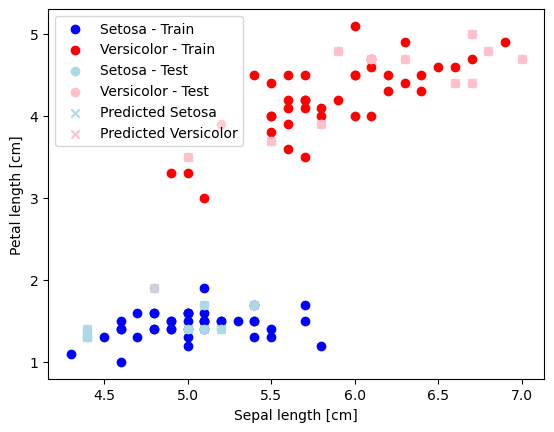

In [87]:
import matplotlib.pyplot as plt

# Predict labels for the test set
predictions = model.predict(X_test)

# Create a scatter plot for training data
plt.scatter(X_train[y_train==0][:, 0], X_train[y_train==0][:, 1], color='blue', label='Setosa - Train')
plt.scatter(X_train[y_train==1][:, 0], X_train[y_train==1][:, 1], color='red', label='Versicolor - Train')

# Create a scatter plot for testing data, make them a bit grayish
plt.scatter(X_test[y_test==0][:, 0], X_test[y_test==0][:, 1], color='lightblue', label='Setosa - Test')
plt.scatter(X_test[y_test==1][:, 0], X_test[y_test==1][:, 1], color='pink', label='Versicolor - Test')

# Create a scatter plot for predictions on the test data
plt.scatter(X_test[predictions==0][:, 0], X_test[predictions==0][:, 1], color='lightblue', marker='x', label='Predicted Setosa')
plt.scatter(X_test[predictions==1][:, 0], X_test[predictions==1][:, 1], color='pink', marker='x', label='Predicted Versicolor')

# Add labels and legend
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')

# Show the plot
plt.show()


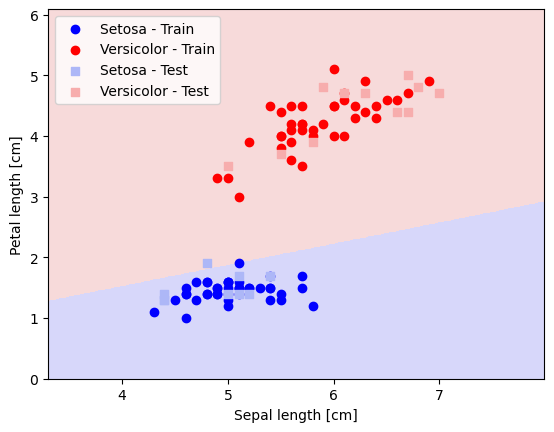

In [88]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate min, max and limits
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict labels for all points in the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create color maps
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#d7d7fa', '#f7dada'])

# Plot the decision boundary
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot training points
plt.scatter(X_train[y_train==0][:, 0], X_train[y_train==0][:, 1], color='blue', label='Setosa - Train')
plt.scatter(X_train[y_train==1][:, 0], X_train[y_train==1][:, 1], color='red', label='Versicolor - Train')

# Plot testing points
plt.scatter(X_test[y_test==0][:, 0], X_test[y_test==0][:, 1], color='#adb7f7', label='Setosa - Test', marker='s')
plt.scatter(X_test[y_test==1][:, 0], X_test[y_test==1][:, 1], color='#f7adad', label='Versicolor - Test', marker='s')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc="upper left")

plt.show()

In [89]:
# Activation function
def activation_function(x):
    return np.where(x >= 0, 1, 0)

# Fitting the data
def fit(X, y, learning_rate=0.01, epochs=1000):
    n_samples, n_features = X.shape
    weights = np.random.random(n_features)
    bias = 0

    max_label = np.max(y)
    y_ = np.array([1 if i == max_label else 0 for i in y])

    for _ in range(epochs):
        for idx, x_i in enumerate(X):
            linear_output = np.dot(x_i, weights) + bias
            y_predicted = activation_function(linear_output)

            update = learning_rate * (y_predicted - y_[idx])
            weights -= update * x_i
            bias -= update
    return weights, bias

# Making predictions
def predict(X, weights, bias):
    linear_output = np.dot(X, weights) + bias
    y_predicted = activation_function(linear_output)
    return y_predicted

# Fit and predict
weights, bias = fit(X_train, y_train, learning_rate=0.01, epochs=10000)
predictions = predict(X_test, weights, bias)

print(f'Perceptron classification accuracy: {accuracy(y_test, predictions)}')


Perceptron classification accuracy: 1.0
